In [1]:
import plotly.graph_objects as go
import networkx as nx

# reading input log file

# test_name = "arldm_chunk2k4c_ssd"
# test_name = "vist_1t"
# test_name = "vist_1t_chunk"
# test_name = "seq9f9s"
# test_name = "s9f9p8_0"
# test_name = "ddmd_skipsim"
test_name = "ddmd"
# test_name = "f48s9p24_1"

stat_path=f"example_stat/{test_name}"
image_path=f"{stat_path}/images"

VFD_ACCESS_SKIP=5

ADD_ADDR=False

STAGE_START = 0
STAGE_END = 9

VFD_IO_SKIP=10
DRAW_GRAPH=True

In [2]:
# My utility functions
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vfd_stat2graph as vfd2g
import utils.vfd_graph2sankey as vfd2sk

# Improve Functions
## TODO
- Add dataset nodes
- Add file address ordering nodes


In [3]:



TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS


STAGE_END is not in TASK_ORDER_LIST, set to max order: 3
TASK_ORDER_LIST = {'openmm': 0, 'aggregate': 1, 'training': 2, 'inference': 3}


['openmm', 'aggregate', 'training', 'inference']

In [4]:
vfd_files = sload.find_files_with_pattern(stat_path, "vfd")
# vfd_files = vfd_files[0:1]
print(vfd_files)

vfd_dict = sload.load_stat_json(vfd_files)
# print(vfd_dict)

print("loading yaml done")

['example_stat/ddmd/42528-vfd_data_stat.json', 'example_stat/ddmd/41648-vfd_data_stat.json', 'example_stat/ddmd/42180-vfd_data_stat.json', 'example_stat/ddmd/41515-vfd_data_stat.json', 'example_stat/ddmd/42584-vfd_data_stat.json', 'example_stat/ddmd/41914-vfd_data_stat.json', 'example_stat/ddmd/41382-vfd_data_stat.json', 'example_stat/ddmd/40876-vfd_data_stat.json', 'example_stat/ddmd/41036-vfd_data_stat.json', 'example_stat/ddmd/40930-vfd_data_stat.json', 'example_stat/ddmd/42845-vfd_data_stat.json', 'example_stat/ddmd/40983-vfd_data_stat.json', 'example_stat/ddmd/41781-vfd_data_stat.json', 'example_stat/ddmd/42047-vfd_data_stat.json', 'example_stat/ddmd/41249-vfd_data_stat.json']
loading example_stat/ddmd/42528-vfd_data_stat.json
loading example_stat/ddmd/41648-vfd_data_stat.json
loading example_stat/ddmd/42180-vfd_data_stat.json
loading example_stat/ddmd/41515-vfd_data_stat.json
loading example_stat/ddmd/42584-vfd_data_stat.json
loading example_stat/ddmd/41914-vfd_data_stat.json
loa

In [5]:
# Show VFD Tracker overhead
sp.show_all_overhead("VFD", vfd_dict)

Total VFD overhead: 11812395.532000002 ms
Total POSIX-OPEN-Time(us): 37439.922000000006 us
Total POSIX-CLOSE-Time(us): 10790.579000000003 us
Total POSIX-READ-Time(us): 1389001.7550000018 us
Total POSIX-WRITE-Time(us): 43293.46100000011 us
Total POSIX-DELETE-Time(us): 0.0 us


In [6]:
G_VFD = nx.DiGraph()
G_VFD = vfd2g.add_task_file_nodes(G_VFD, vfd_dict, TASK_LISTS)

stat_file: example_stat/ddmd/42528-vfd_data_stat.json
stat_file: example_stat/ddmd/41648-vfd_data_stat.json
stat_file: example_stat/ddmd/42180-vfd_data_stat.json
stat_file: example_stat/ddmd/41515-vfd_data_stat.json
stat_file: example_stat/ddmd/42584-vfd_data_stat.json
Unknown access_type: not_accessed
stat_file: example_stat/ddmd/41914-vfd_data_stat.json
stat_file: example_stat/ddmd/41382-vfd_data_stat.json
stat_file: example_stat/ddmd/40876-vfd_data_stat.json
stat_file: example_stat/ddmd/41036-vfd_data_stat.json
stat_file: example_stat/ddmd/40930-vfd_data_stat.json
stat_file: example_stat/ddmd/42845-vfd_data_stat.json
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accessed
Unknown access_type: not_accesse

In [7]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)

# for task, stat in task_file_map.items():
#     print(f"{task} : {stat}")

task_file_map = {'aggregate-42528': {'order': 1, 'io_cnt': 10120, 'input': ['/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0000/stage0000_task0000.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0001/stage0000_task0001.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0002/stage0000_task0002.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0003/stage0000_task0003.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0004/stage0000_task0004.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0005/stage0000_task0005.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0006/stage0000_task0006.h5', '/mnt/nvme/mtang11/ddmd_runs/test_100ps_i1_nfs1/molecular_dynamics_runs/stage0000/task0007/stage0000_task0007.h5', '/mn

In [8]:
G_VFD = vfd2g.set_task_position(G_VFD, task_file_map)

task_name: aggregate-42528, task_order: 1
node aggregate-42528 : {'pos': (0, 0), 'rpos': 0, 'phase': 1, 'type': 'task'}, pos: (0, 0)
node : aggregate-42528, pos: (2, 0)
task_name: openmm-41648, task_order: 0
node openmm-41648 : {'pos': (0, 0), 'rpos': 0, 'phase': 1, 'type': 'task'}, pos: (0, 0)
node : openmm-41648, pos: (0, 0)
task_name: openmm-42180, task_order: 0
node openmm-42180 : {'pos': (0, 0), 'rpos': 0, 'phase': 1, 'type': 'task'}, pos: (0, 0)
node : openmm-42180, pos: (0, 1)
task_name: openmm-41515, task_order: 0
node openmm-41515 : {'pos': (0, 0), 'rpos': 0, 'phase': 1, 'type': 'task'}, pos: (0, 0)
node : openmm-41515, pos: (0, 2)
task_name: training-42584, task_order: 2
node training-42584 : {'pos': (0, 0), 'rpos': 0, 'phase': 2, 'type': 'task'}, pos: (0, 0)
node : training-42584, pos: (4, 0)
task_name: openmm-41914, task_order: 0
node openmm-41914 : {'pos': (0, 0), 'rpos': 0, 'phase': 1, 'type': 'task'}, pos: (0, 0)
node : openmm-41914, pos: (0, 3)
task_name: openmm-41382, 

In [9]:
stat_str = sp.show_vfd_stats(G_VFD)
print(stat_str)

Total number of links: 54
Total I/O size: 9.37 MB
Total I/O count: 47925
Total bandwidth: 299.81 B/s
Average I/O size: 195.61 B
Medium I/O size: 9.57 KB
Inital input size: 0



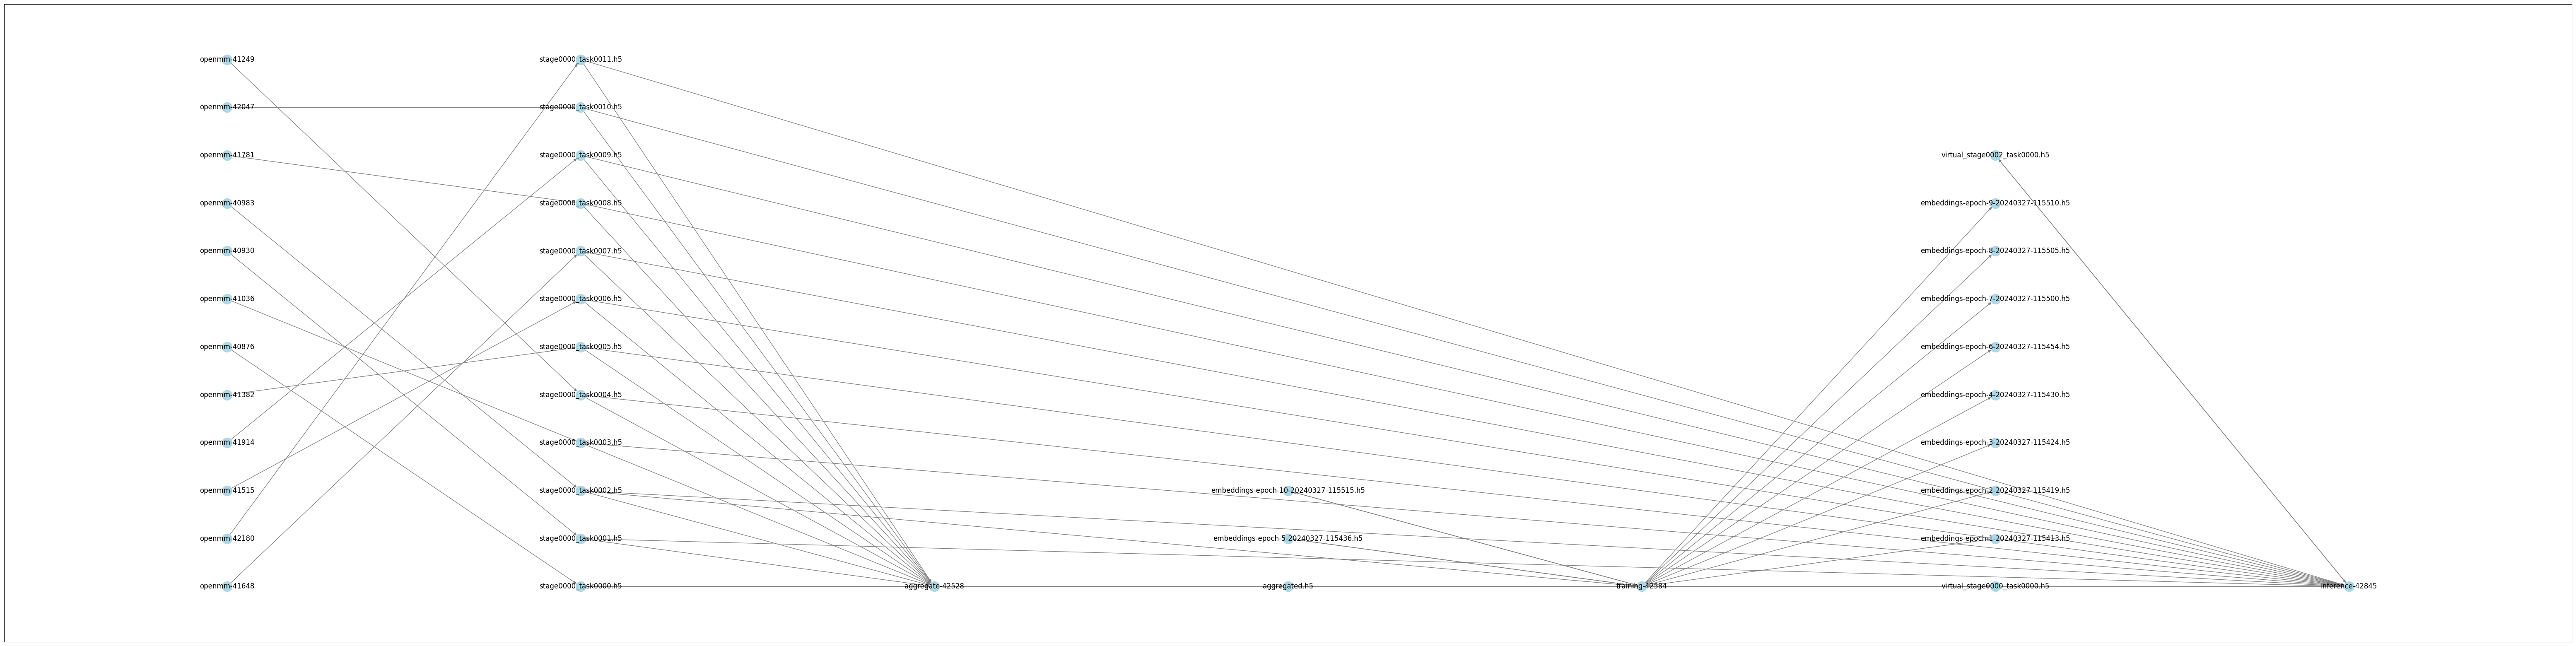

In [10]:
# sp.display_all_nodes_attr(G_VFD)
G_VFD = vfd2g.set_file_position(G_VFD, task_file_map)
# sp.display_all_nodes_attr(G_VFD)

sp.draw_graph(G_VFD, test_name, stat_path, graph_type="vfd", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)




In [11]:
vfd2g.prepare_sankey_stat(G_VFD, io_skip=VFD_IO_SKIP)

In [12]:
vfd2sk.time_to_file_x_pos(G_VFD)

All tasks:  ['aggregate-42528', 'openmm-41648', 'openmm-42180', 'openmm-41515', 'training-42584', 'openmm-41914', 'openmm-41382', 'openmm-40876', 'openmm-41036', 'openmm-40930', 'inference-42845', 'openmm-40983', 'openmm-41781', 'openmm-42047', 'openmm-41249']
stage0000_task0000.h5 New pos:  (1.0, 0)
stage0000_task0001.h5 New pos:  (1.0454545454545454, 1)
stage0000_task0002.h5 New pos:  (1.0909090909090908, 2)
stage0000_task0003.h5 New pos:  (1.1363636363636362, 3)
stage0000_task0004.h5 New pos:  (1.1818181818181819, 4)
stage0000_task0005.h5 New pos:  (1.2272727272727273, 5)
stage0000_task0006.h5 New pos:  (1.2727272727272727, 6)
stage0000_task0007.h5 New pos:  (1.3181818181818181, 7)
stage0000_task0008.h5 New pos:  (1.3636363636363638, 8)
stage0000_task0009.h5 New pos:  (1.4090909090909092, 9)
stage0000_task0010.h5 New pos:  (1.4545454545454546, 10)
stage0000_task0011.h5 New pos:  (1.5, 11)
aggregated.h5 New pos:  (3.0, 0)
embeddings-epoch-5-20240327-115436.h5 New pos:  (3.25, 1)
embe

In [29]:
label_on=False # True False Partial

vfd_nodes, vfd_nodes_dict = vfd2sk.get_nodes_for_sankey(G_VFD, rm_tags=["PID", ""], label_on=label_on)

# print(vfd_nodes)

vfd_links = vfd2sk.get_links_for_sankey(G_VFD, vfd_nodes_dict, val_sqrt=True)

if DRAW_GRAPH:

    fig = go.Figure(go.Sankey( node = vfd_nodes, link = vfd_links, orientation='h'))

    width = 500
    height = 500

    fig.update_layout(
        autosize=False, width=width, height=height, font=dict(size=14),
        margin=dict(
            l=width/100, r=width/50,
            b=height/10, t=height/10,
            pad=1
        ),
        paper_bgcolor='rgba(0,0,0,0)',
        )

    fig.show()

    if label_on:
        save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-labeled-sankey-s{STAGE_END-STAGE_START+1}.html"
    else:
        save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-s{STAGE_END-STAGE_START+1}.html"

    fig.write_html(save_html_path)
    print(f"Sankey saved to {save_html_path}")

bandwidth range: 45.2 KB/s ~ 15.65 MB/s


Sankey saved to example_stat/ddmd/vfd-4s-ddmd-sankey-s4.html


In [14]:
# Create a manual legend using annotations.

def add_legend_to_graph(fig,save_img=False):
    LEGEND_ITEMS = {
        "Tasks":{"color":"red", "text":"Tasks"},
        "Files":{"color":"blue", "text":"Files"},
        "Edges":{"color":"lightblue", "text":"File bandwidth, darker the color, higher the bandwidth"},
    }

    legend_items = [
        go.layout.Annotation(
            x=0.9,  # X-coordinate for legend item
            y=0.85 - i * 0.03,  # Y-coordinate for legend item (adjust for position)
            xref='paper',
            yref='paper',
            text=f"{item_type} - {LEGEND_ITEMS[item_type]['color']}",
            showarrow=False,
            font=dict(size=14, color=LEGEND_ITEMS[item_type]['color']),
            # bordercolor='grey',  # Set the border color for the legend box
            # borderwidth=1,  # Set the border width for the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Add a transparent background color
        )
        for i, item_type in enumerate(LEGEND_ITEMS.keys())
    ]
    fig.update_layout(annotations=legend_items)
    fig.show()
    if save_img:
        fig.write_html(f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-annotated.html")
